<a href="https://colab.research.google.com/github/jinzus/miscellaneous/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K_means is a very well known clustering algorithm. Even if it has many limitations due to its assumptions and is a rather basic approach, in some applications may be the right choice. Morevorer, it's one of the fastest clustering algorithms!
Let's implement the algorithm from scratch!

In [1]:
# Import dependencies

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
import math
%matplotlib inline

Text(0.5, 1.0, 'Scatter plot')

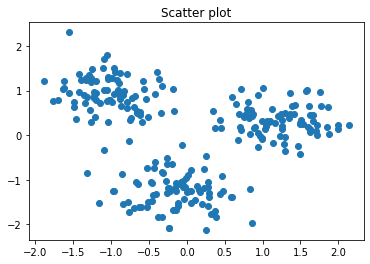

In [2]:
# Create the dataset

def generate_dataset():
  global n_instances
  n_instances=250
  dataset=np.empty((n_instances,2))
  n_instances_gauss_1=83
  n_instances_gauss_2=83
  n_instances_gauss_3=84
  gauss_1_loc_1,gauss_1_scale_1=2,3
  gauss_1_loc_2,gauss_1_scale_2=20,3
  gauss_2_loc_1,gauss_2_scale_1=8,3
  gauss_2_loc_2,gaus_2_scale_2=3,3
  gauss_3_loc_1,gauss_3_scale_1=18,3
  gauss_3_loc_2,gaus_3_scale_2=15,3

  for item in range(n_instances_gauss_1):
    feat_1=np.random.normal(gauss_1_loc_1,gauss_1_scale_1,1)+np.random.randint(0,2,1)
    feat_2=np.random.normal(gauss_1_loc_2,gauss_1_scale_2,1)+np.random.randint(0,2,1)
    dataset[item,0]=feat_1
    dataset[item,1]=feat_2

  for item in range(n_instances_gauss_1,n_instances_gauss_1+n_instances_gauss_2):
    feat_1=np.random.normal(gauss_2_loc_1,gauss_2_scale_1,1)+np.random.randint(0,2,1)
    feat_2=np.random.normal(gauss_2_loc_2,gaus_2_scale_2,1)+np.random.randint(0,2,1)
    dataset[item,0]=feat_1
    dataset[item,1]=feat_2

  for item in range(n_instances_gauss_1+n_instances_gauss_2,n_instances_gauss_1+n_instances_gauss_2+n_instances_gauss_3):
    feat_1=np.random.normal(gauss_3_loc_1,gauss_3_scale_1,1)+np.random.randint(0,2,1)
    feat_2=np.random.normal(gauss_3_loc_2,gaus_3_scale_2,1)+np.random.randint(0,2,1)
    dataset[item,0]=feat_1
    dataset[item,1]=feat_2
  
  return StandardScaler().fit_transform(dataset)

np.random.seed(13)
dataset=generate_dataset()
plt.scatter(dataset[:,0],dataset[:,1])
plt.title("Scatter plot",fontsize=12)

In [3]:
class K_Means_Clustering:
  def __init__(self,n_clusters=3,inizializations=5,max_iter=500,early_stop=8):
    self.n_clusters=n_clusters
    self.inizializations=inizializations
    self.max_iter=max_iter
    self.early_stop=early_stop
  def train(self):
    # Extract n_clusters centroids chosen randomly from dataset instances
    def random_init():
      n_features=dataset.shape[-1]
      centroids=np.empty((self.n_clusters,n_features))
      for item in range(self.n_clusters):
        index=np.random.randint(0,(n_instances-1),1)
        centroids[item]=dataset[index]
      return centroids
    # Compute the distance between each centroid and each instance
    def update(centroids):
      distances=distance_matrix(dataset,centroids)
      ass_index=np.argmin(distances,axis=-1)
      closest_cluster=centroids[ass_index]
      # Compute inertias
      inertia=np.empty((n_instances,1))
      for item in range(n_instances):
        inertia[item]=euclidean(dataset[item],closest_cluster[item])
      total_inertia=inertia.sum(axis=0)
      # Compute means:
      means=[]
      for item in range(self.n_clusters):
        means.append(np.mean(dataset[ass_index==item],axis=0))
      for item in range(self.n_clusters):
        centroids[item]=means[item]
      return centroids,distances,total_inertia,ass_index 
    store_indices=[]
    store_inertia=[]
    store_distances=[]
    store_centroids=[]
    best_iter=[]
    for _ in range(self.inizializations): 
      previous_inertia=float("inf")
      inertias=[]
      no_improve=0
      for iter in range(self.max_iter):
        if iter==0:
          centroids=random_init()
        centroids,distances,total_inertia,index_assignments=update(centroids)
        inertias.append(total_inertia[0])
        if total_inertia!=previous_inertia:
          previous_inertia=total_inertia
          no_improve+=0
        else:
          no_improve+=1
          if no_improve==self.early_stop:
            break
      best_iter.append(inertias)
      store_indices.append(index_assignments)
      store_inertia.append(total_inertia)
      store_distances.append(distances)
      store_centroids.append(centroids)
      last_steps=[]
      for item in best_iter:
        last_step=item[-1]
        last_steps.append(last_step)
      best_one=np.argwhere(last_steps==min(last_steps))[0,0]
    return store_indices[best_one],store_inertia[best_one],store_distances[best_one],store_centroids[best_one] 

In [4]:
k_means=K_Means_Clustering()
get_index,get_inertia,get_distance,get_centroids=k_means.train()

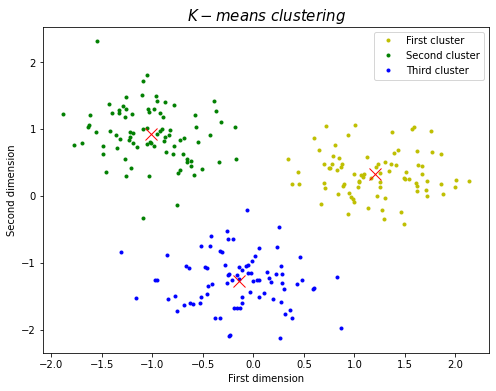

In [5]:
plt.figure(figsize=(8,6))
plt.plot(dataset[:,0][get_index==0],dataset[:,1][get_index==0],"y.",label="First cluster")
plt.plot(dataset[:,0][get_index==1],dataset[:,1][get_index==1],"g.",label="Second cluster")
plt.plot(dataset[:,0][get_index==2],dataset[:,1][get_index==2],"b.",label="Third cluster")
for centroid in range(3):
  plt.plot(get_centroids[centroid,0],get_centroids[centroid,1],"xr",markersize=12)
plt.title("$K-means$ $clustering$",fontsize=15)
plt.xlabel("First dimension",fontsize=10)
plt.ylabel("Second dimension",fontsize=10)
plt.legend(loc="upper right")